In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
charts = pd.read_csv('../../data/songs.csv')
charts

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,-4.865,0.0436,0.05130,0.000000,0.1060,0.4600,160.087,224213.0
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787.0
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,-8.550,0.0733,0.00290,0.000208,0.2970,0.3850,141.466,308120.0
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,-8.668,0.0905,0.39100,0.004870,0.2430,0.8060,71.165,162373.0
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,-12.556,0.0511,0.89700,0.000000,0.2580,0.4740,143.736,175893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266.0
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,-8.157,0.0342,0.03740,0.000010,0.1270,0.7930,112.041,182880.0
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,-5.302,0.2160,0.05830,0.000000,0.1640,0.5380,82.524,185493.0
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,-5.242,0.0871,0.02050,0.000232,0.0433,0.9740,119.967,289013.0


Data Exploration

(<AxesSubplot:ylabel='Frequency'>,
 count    2554.000000
 mean        0.667982
 std         0.147678
 min         0.150000
 25%         0.573000
 50%         0.681500
 75%         0.781000
 max         0.980000
 Name: danceability, dtype: float64)

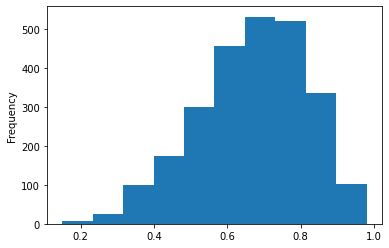

In [4]:
charts['danceability'].plot(kind='hist'), charts['danceability'].describe()

(<AxesSubplot:ylabel='Frequency'>,
 count    2554.000000
 mean        0.612003
 std         0.169731
 min         0.021800
 25%         0.507250
 50%         0.626500
 75%         0.732750
 max         0.973000
 Name: energy, dtype: float64)

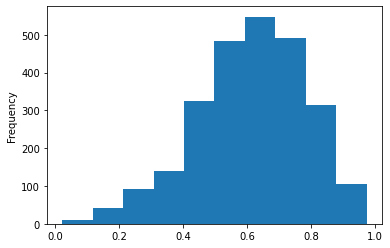

In [5]:
charts['energy'].plot(kind='hist'), charts['energy'].describe()

(<AxesSubplot:ylabel='Frequency'>,
 count    2554.000000
 mean       -6.738406
 std         2.650015
 min       -31.160000
 25%        -7.978250
 50%        -6.332000
 75%        -4.914000
 max        -0.515000
 Name: loudness, dtype: float64)

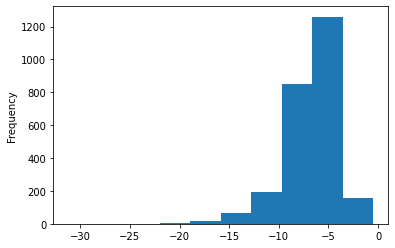

In [6]:
charts['loudness'].plot(kind='hist'), charts['loudness'].describe()

(<AxesSubplot:ylabel='Frequency'>,
 count    2554.000000
 mean        0.520207
 std         0.231527
 min         0.032000
 25%         0.338000
 50%         0.525000
 75%         0.700750
 max         0.978000
 Name: valence, dtype: float64)

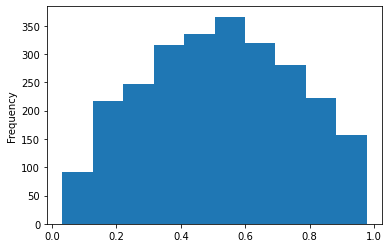

In [7]:
charts['valence'].plot(kind='hist'), charts['valence'].describe()

In [8]:
def get_vibe(vibe):
    """ 
    Categorizes each song into a vibe based on specific thresholds/criteria
    
    features:
    - danceability [0, 1]
    - energy [0, 1]
    - loudness [-60, 0]
    - valence [0, 1]

    vibes:
    Chill
    - (charts['danceability'] > charts['danceability'].mean()) & (charts['valence'] <= charts['valence'].mean()) & (charts['energy'] > charts['energy'].mean()) & (charts['loudness'] <= charts['loudness'].mean()) 
    Hype
    - (charts['danceability'] > charts['danceability'].mean()) & (charts['valence'] > charts['valence'].mean()) & (charts['energy'] > charts['energy'].mean()) & (charts['loudness'] > charts['loudness'].mean()) 
    Relax
    - (charts['danceability'] <= charts['danceability'].mean()) & (charts['valence'] <= charts['valence'].mean()) & (charts['energy'] <= charts['energy'].mean()) & (charts['loudness'] <= charts['loudness'].mean()) 
    Other
    - else
    """

    if (charts.loc[vibe, 'danceability'] > charts['danceability'].mean()) & (charts.loc[vibe,'valence'] <= charts['valence'].mean()) & (charts.loc[vibe, 'energy'] > charts['energy'].mean()) & (charts.loc[vibe, 'loudness'] <= charts['loudness'].mean()):
        return 'Chill'
    else: 
        return 'Other'

#charts = charts.assign(vibe = 'Other')
#charts = charts['vibe'].apply(get_vibe)

In [9]:
def return_tempo(tempo):
    if tempo < 60:
        return 0
    elif tempo < 90:
        return 1 / 6
    elif tempo < 110:
        return 2 / 6
    elif tempo < 120:
        return 3 / 6
    elif tempo < 160:
        return 4 / 6
    elif tempo < 180:
        return 5 / 6
    else:
        return 6 / 6
        
charts = charts.assign(tempo_name = charts['tempo'].apply(return_tempo))

In [10]:
# define our features
features_array = np.array(charts.columns)
features = np.delete(features_array, [0, 1])
features

array(['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration', 'tempo_name'], dtype=object)

Spotify's Descriptions of the Default Features:
* [Click Here](developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

In [12]:
# convert milliseconds to minutes
charts = charts.assign(duration_min = charts['duration'] / 60000).drop(columns=['duration'])

# feature scaling
scaler = MinMaxScaler()
scaler.fit(np.array(charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']]))
charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']] = scaler.transform(np.array(charts[['tempo', 'loudness', 'duration_min', 'key', 'mode']]))

# Scaled!
charts


KeyError: 'duration'

Feature Selection

* Choose the maximum of variables you want to retain (maxvars), the minimum and maximum number of clusters (kmin and kmax) and create an empty list: selected_variables.
* Loop from kmin to kmax. Then, using every variable in turn, record the silhouette value for every combination of variable and number of clusters (from kmin to kmax), using K-Means.
* Choose the variable giving the maximum silhouette value, add it to selected_variables and remove it from the list of variables to test.
* Repeat steps 2 and 3 by using the selected_variables list and adding to it each remaining variable in turn, until some stop criterion has been reached (in this case the number of variables to keep, maxvars).

In [ ]:
# Select the audio features to use for clustering
X = charts[['danceability', 'energy', 'key', 'mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'tempo_name', 'duration_min']]

# Determine the optimal number of clusters using silhouette score
sil_scores = []
for n_clusters in range(3, 13):
    kmeans = KMeans(n_clusters=n_clusters)
    pred_y = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, pred_y)
    sil_scores.append(sil_score)

optimal_n_clusters = np.argmax(sil_scores) + 5

# Cluster the songs based on the selected audio features
kmeans = KMeans(n_clusters=optimal_n_clusters)
preds = kmeans.fit_predict(X)

# Plot the most important audio features for each cluster
for i in range(optimal_n_clusters):
    cluster_X = X[preds == i]
    feature_means = cluster_X.mean()
    important_features = feature_means.nlargest(7).index
    important_feature_values = feature_means.loc[important_features]
    plt.bar(important_features, important_feature_values)
    plt.xlabel('Audio Features')
    plt.ylabel('Mean Value')
    plt.title(f'Cluster {i+1}')
    plt.savefig(f'../preprocess/figures/cluster_{i+1}_important_features.png')
    plt.close()

In [20]:
# audio features is a dataframe with only the features
audio_features = charts.iloc[:, 2:]
kmin = 2
kmax = 7

# Compute the silhouette score for each audio feature
silhouette_scores = {}
for feature in audio_features.columns:
    X = audio_features[[feature]]
    scores = []
    for n_clusters in range(kmin, kmax+1):
        kmeans = KMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        scores.append(silhouette_avg)
    silhouette_scores[feature] = sum(scores) / len(scores)

# Select the top n features with the highest average silhouette score
n = 13
top_features = sorted(silhouette_scores, key=silhouette_scores.get, reverse=True)#[:n]
print(f"Top {n} features with highest average silhouette score:")
for feature in top_features:
    print(f"{feature}: {silhouette_scores[feature]:.2f}")
audio_features

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: Con

Top 13 features with highest average silhouette score:
mode: 1.00
instrumentalness: 0.97
tempo_name: 0.88
key: 0.68
speechiness: 0.66
liveness: 0.62
acousticness: 0.62
tempo: 0.57
valence: 0.55
loudness: 0.54
danceability: 0.54
energy: 0.54
duration_min: 0.53


,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_name,duration_min
0,0.501,0.815,0.090909,1.0,0.858052,0.0436,0.05130,0.000000,0.1060,0.4600,0.710372,0.833333,0.286447
1,0.548,0.847,0.090909,1.0,0.911176,0.1860,0.06220,0.000000,0.0816,0.1000,0.777751,0.833333,0.398980
2,0.333,0.927,0.818182,0.0,0.737804,0.0733,0.00290,0.000208,0.2970,0.3850,0.599926,0.666667,0.414785
3,0.739,0.317,0.000000,1.0,0.733953,0.0905,0.39100,0.004870,0.2430,0.8060,0.182955,0.166667,0.191861
4,0.478,0.341,0.454545,1.0,0.607081,0.0511,0.89700,0.000000,0.2580,0.4740,0.613390,0.666667,0.212540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,0.667,0.373,0.363636,1.0,0.710426,0.0500,0.78500,0.000000,0.0906,0.0823,0.497209,0.666667,0.202404
2550,0.647,0.477,0.000000,1.0,0.750628,0.0342,0.03740,0.000010,0.1270,0.7930,0.425400,0.500000,0.223227
2551,0.747,0.780,0.818182,0.0,0.843792,0.2160,0.05830,0.000000,0.1640,0.5380,0.250328,0.166667,0.227223
2552,0.937,0.791,0.000000,1.0,0.845750,0.0871,0.02050,0.000232,0.0433,0.9740,0.472411,0.500000,0.385560


## Perform K-Means Clustering

We are choosing k = 6 based on the 6 most popular genres, (Pop, Hip-Hop, R&B, EDM, Rock, and Jazz).

In [26]:
# Select the top n features
selected_features = audio_features[top_features]

# Apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0)
labels = kmeans.fit_predict(selected_features)

# Add cluster labels to the data
charts['Cluster'] = labels
selected_features['Cluster'] = labels

# Melt data to long format for radar chart
melted_features = selected_features.melt(id_vars=['Cluster'])

# Visualize clusters on a radar chart
fig_radar = px.line_polar(melted_features, theta='variable', r='value', color='Cluster', line_close=True)
fig_radar.show()
charts

/var/folders/0t/_mldn_vd4ql2f66g6rmtvm740000gn/T/ipykernel_33535/198151211.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/palvins/.pyenv/versions/3.9.4/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed fr

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_name,duration_min,Cluster
0,'Til You Can't,Cody Johnson,0.501,0.815,0.090909,1.0,0.858052,0.0436,0.05130,0.000000,0.1060,0.4600,0.710372,0.833333,0.286447,2
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,0.090909,1.0,0.911176,0.1860,0.06220,0.000000,0.0816,0.1000,0.777751,0.833333,0.398980,2
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,0.818182,0.0,0.737804,0.0733,0.00290,0.000208,0.2970,0.3850,0.599926,0.666667,0.414785,1
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.000000,1.0,0.733953,0.0905,0.39100,0.004870,0.2430,0.8060,0.182955,0.166667,0.191861,2
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,0.454545,1.0,0.607081,0.0511,0.89700,0.000000,0.2580,0.4740,0.613390,0.666667,0.212540,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,0.363636,1.0,0.710426,0.0500,0.78500,0.000000,0.0906,0.0823,0.497209,0.666667,0.202404,4
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.000000,1.0,0.750628,0.0342,0.03740,0.000010,0.1270,0.7930,0.425400,0.500000,0.223227,2
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,0.818182,0.0,0.843792,0.2160,0.05830,0.000000,0.1640,0.5380,0.250328,0.166667,0.227223,1
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.000000,1.0,0.845750,0.0871,0.02050,0.000232,0.0433,0.9740,0.472411,0.500000,0.385560,2
